<a href="https://colab.research.google.com/github/renzotap/GOES_16_17_18_RGB/blob/main/GOES_16_17_18_RGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install metpy earthpy cartopy xarray matplotlib s3fs numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.3/424.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.6/199.6 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.5/305.5 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 117.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fssp

In [ ]:
from datetime import datetime
import xarray as xr
import matplotlib.pyplot as plt
# %matplotlib inline
import cartopy.crs as ccrs
import earthpy.plot as ep
import metpy
import numpy as np
import s3fs
import os

In [ ]:
bucket_name = 'noaa-goes16' # Change to 'noaa-goes17' for GOES-17 satellite
product_name = 'ABI-L1b-RadC' # See 'https://docs.opendata.aws/noaa-goes16/cics-readme.html' for other GOES-R products
year = 2022
day_of_year = 79
hour = 14

In [ ]:
# Adjust pathname to local directory
directory = "./"

# Make new directories to store files
if not os.path.isdir(directory + product_name):
    os.mkdir(directory + product_name)

In [ ]:
# Use anonymous credentials to access public data from AWS
fs = s3fs.S3FileSystem(anon=True)

#Print the prefix for the file of interest
prefix = f'{bucket_name}/{product_name}/{year}/{day_of_year:03.0f}/{hour:02.0f}/'
print(prefix)

# Write prefix for the files of interest, and list all files beginning with this prefix.
files = fs.ls(prefix)
print(files)

noaa-goes16/ABI-L1b-RadC/2022/079/14/
['noaa-goes16/ABI-L1b-RadC/2022/079/14/OR_ABI-L1b-RadC-M6C01_G16_s20220791401168_e20220791403541_c20220791403581.nc', 'noaa-goes16/ABI-L1b-RadC/2022/079/14/OR_ABI-L1b-RadC-M6C01_G16_s20220791406168_e20220791408541_c20220791408579.nc', 'noaa-goes16/ABI-L1b-RadC/2022/079/14/OR_ABI-L1b-RadC-M6C01_G16_s20220791411168_e20220791413541_c20220791413578.nc', 'noaa-goes16/ABI-L1b-RadC/2022/079/14/OR_ABI-L1b-RadC-M6C01_G16_s20220791416168_e20220791418541_c20220791418581.nc', 'noaa-goes16/ABI-L1b-RadC/2022/079/14/OR_ABI-L1b-RadC-M6C01_G16_s20220791421168_e20220791423541_c20220791423585.nc', 'noaa-goes16/ABI-L1b-RadC/2022/079/14/OR_ABI-L1b-RadC-M6C01_G16_s20220791426168_e20220791428541_c20220791428578.nc', 'noaa-goes16/ABI-L1b-RadC/2022/079/14/OR_ABI-L1b-RadC-M6C01_G16_s20220791431168_e20220791433541_c20220791433574.nc', 'noaa-goes16/ABI-L1b-RadC/2022/079/14/OR_ABI-L1b-RadC-M6C01_G16_s20220791436168_e20220791438541_c20220791438578.nc', 'noaa-goes16/ABI-L1b-RadC

In [ ]:
# From the list of all files, make three shorter lists containing only files from Channels 1, 2, and 3, respectively.
for file in files:
    name = str(file)
    # print(name)
    if "C01" in name:
        C01_file_list = []
        C01_file_list.append(file)
    if "C02" in name:
        C02_file_list = []
        C02_file_list.append(file)
    if "C03" in name:
        C03_file_list = []
        C03_file_list.append(file)

print(C01_file_list)
print(C02_file_list)
print(C03_file_list)

['noaa-goes16/ABI-L1b-RadC/2022/079/14/OR_ABI-L1b-RadC-M6C01_G16_s20220791456168_e20220791458541_c20220791458579.nc']
['noaa-goes16/ABI-L1b-RadC/2022/079/14/OR_ABI-L1b-RadC-M6C02_G16_s20220791456168_e20220791458541_c20220791458566.nc']
['noaa-goes16/ABI-L1b-RadC/2022/079/14/OR_ABI-L1b-RadC-M6C03_G16_s20220791456168_e20220791458541_c20220791458584.nc']


In [ ]:
# Download the first file from each of the Channel 1, 2, and 3 lists to your local directory. This may take a minute.
# When scanning in Mode 6, ABI produces 12 CONUS images every hour. The first file is the image taken closest to the
# top of the hour.
# If it is needed to download the file directly simply replace "bucket_name" and "key"
#Example of bucket name: noaa-goes16
#Example of key: ABI-L1b-RadC/2020/348/16/OR_ABI-L1b-RadC-M6C01_G16_s20203481656082_e20203481658455_c20203481658505.nc
#resp = requests.get(f'https://{bucket_name}.s3.amazonaws.com/{key}')

print("Downloading...")

first_C01file = C01_file_list[0]
path1 = directory + product_name + first_C01file.split("/")[-1]
fs.download(first_C01file, path1)
print("\nSuccessfully downloaded:\n" + first_C01file)

first_C02file = C02_file_list[0]
path2 = directory + product_name + first_C02file.split("/")[-1]
fs.download(first_C02file, path2)
print(first_C02file)

first_C03file = C03_file_list[0]
path3 = directory + product_name + first_C03file.split("/")[-1]
fs.download(first_C03file, path3)
print(first_C03file)

Downloading...

Successfully downloaded:
noaa-goes16/ABI-L1b-RadC/2022/079/14/OR_ABI-L1b-RadC-M6C01_G16_s20220791456168_e20220791458541_c20220791458579.nc
noaa-goes16/ABI-L1b-RadC/2022/079/14/OR_ABI-L1b-RadC-M6C02_G16_s20220791456168_e20220791458541_c20220791458566.nc
noaa-goes16/ABI-L1b-RadC/2022/079/14/OR_ABI-L1b-RadC-M6C03_G16_s20220791456168_e20220791458541_c20220791458584.nc


In [ ]:
# Open the three files
Band1 = xr.open_dataset(path1)
print("Band 1 dataset: \n",Band1)
print("Band 1 Central wavelength is",float(Band1['band_wavelength'][0]),Band1['band_wavelength'].units)
Band2 = xr.open_dataset(path2)
print("Band 2 Central wavelength is",float(Band2['band_wavelength'][0]),Band2['band_wavelength'].units)
Band3 = xr.open_dataset(path3)
print("Band 3 Central wavelength is",float(Band3['band_wavelength'][0]),Band3['band_wavelength'].units)

Band 1 dataset: 
 <xarray.Dataset> Size: 120MB
Dimensions:                                           (y: 3000, x: 5000,
                                                       number_of_time_bounds: 2,
                                                       number_of_image_bounds: 2,
                                                       num_star_looks: 24,
                                                       band: 1)
Coordinates:
    t                                                 datetime64[ns] 8B ...
  * y                                                 (y) float32 12kB 0.1282...
  * x                                                 (x) float32 20kB -0.101...
    y_image                                           float32 4B ...
    x_image                                           float32 4B ...
    band_id                                           (band) int8 1B ...
    band_wavelength                                   (band) float32 4B ...
    t_star_look                         

In [ ]:
# Print date and time information

# Scan's start time, converted to datetime object
scan_start = datetime.strptime(Band1.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')

# Scan's end time, converted to datetime object
scan_end = datetime.strptime(Band1.time_coverage_end, '%Y-%m-%dT%H:%M:%S.%fZ')

# File creation time, convert to datetime object
file_created = datetime.strptime(Band1.date_created, '%Y-%m-%dT%H:%M:%S.%fZ')

# The 't' variable is the scan's midpoint time
midpoint = str(Band1['t'].data)[:-8]
scan_mid = datetime.strptime(midpoint, '%Y-%m-%dT%H:%M:%S.%f')

print('Scan Start    : {}'.format(scan_start))
print('Scan Midpoint : {}'.format(scan_mid))
print('Scan End      : {}'.format(scan_end))
print('File Created  : {}'.format(file_created))
print('Scan Duration : {:.2f} minutes'.format((scan_end-scan_start).seconds/60))

Scan Start    : 2022-03-20 14:56:16.800000
Scan Midpoint : 2022-03-20 14:57:35.500000
Scan End      : 2022-03-20 14:58:54.100000
File Created  : 2022-03-20 14:58:57.900000
Scan Duration : 2.62 minutes


In [ ]:
# Load the three bands into appropriate red (R), green (G), and blue (B) variables
R = Band2['Rad'].data
print("Red Band data:\n", R)
G = Band3['Rad'].data
print("Green Band data:\n",G)
B = Band1['Rad'].data
print("Blue Band data:\n",B)



Red Band data:
 [[       nan        nan        nan ... 191.7481   193.80978  185.2458  ]
 [       nan        nan        nan ... 176.68181  198.09178  198.09178 ]
 [       nan        nan        nan ... 173.82715  177.1576   177.31618 ]
 ...
 [ 50.600883  51.235252  67.25308  ...  22.05425   21.895658  22.371439]
 [ 50.600883  54.72428   66.30153  ...  22.371439  22.05425   22.688623]
 [ 32.67994   63.764046  72.32803  ...  22.212843  22.05425   23.005808]]
Green Band data:
 [[       nan        nan        nan ... 103.67451  105.55907  109.32819 ]
 [       nan        nan        nan ...  90.85948   92.74404   98.02081 ]
 [       nan        nan        nan ... 110.082016 104.051414 102.54377 ]
 ...
 [ 42.237762  55.429703  51.660576 ...   9.069458   9.446371   9.069458]
 [ 38.468636  44.87615   56.937347 ...   9.446371   9.069458   9.069458]
 [ 32.061123  41.860847  38.84555  ...   9.823284   9.446371   9.069458]]
Blue Band data:
 [[       nan        nan        nan ... 286.7243   292.40906  

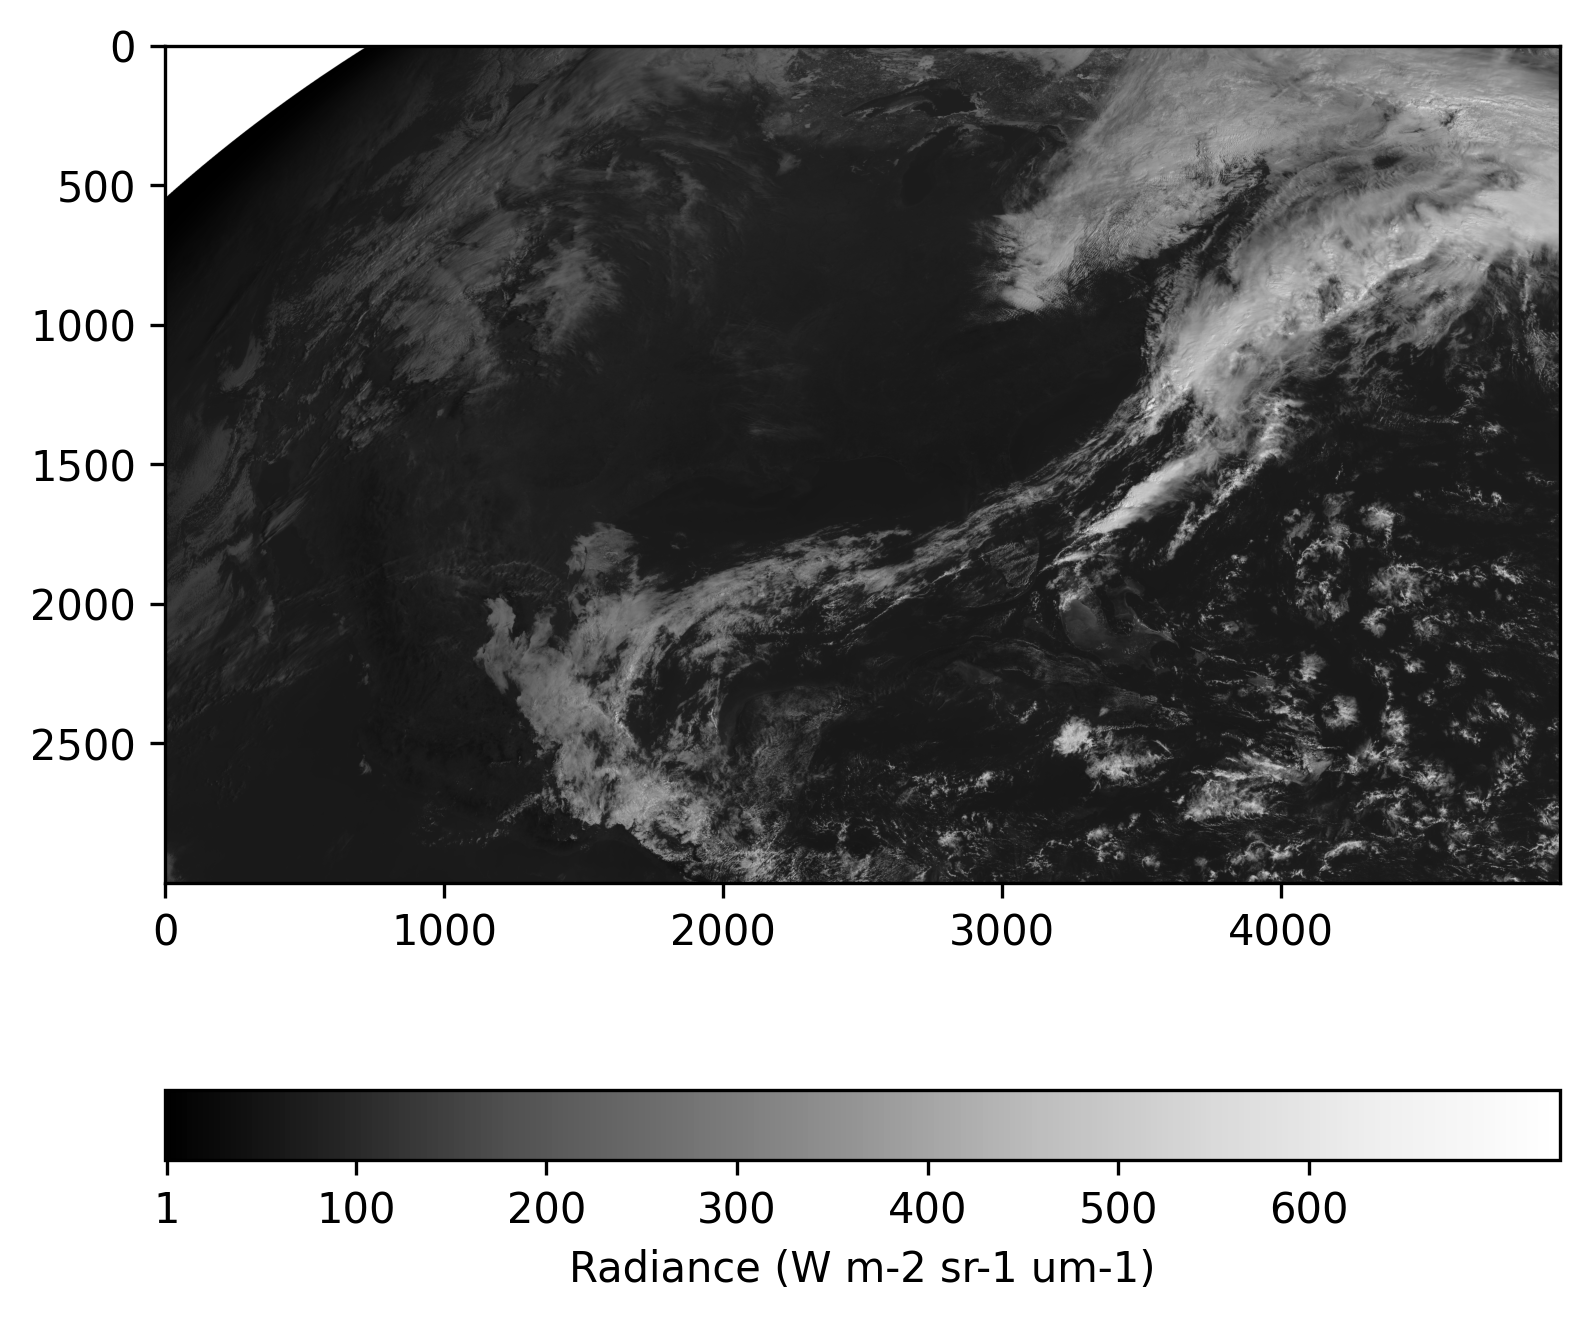

In [ ]:
# Plot the Blue Band radiances to check if data loaded correctly
fig = plt.figure(figsize=(6,6),dpi=300)
im = plt.imshow(B, cmap='Greys_r')
cb = fig.colorbar(im, orientation='horizontal')
cb.set_ticks([1, 100, 200, 300, 400, 500, 600])
cb.set_label('Radiance (W m-2 sr-1 um-1)')
plt.show()

In [ ]:
# Print the kappa coefficients for each band
kappa_B = Band1['kappa0'].data
kappa_R = Band2['kappa0'].data
kappa_G = Band3['kappa0'].data

print('Band 1 kappa coefficient = ', kappa_B)
print('Band 2 kappa coefficient = ', kappa_R)
print('Band 3 kappa coefficient = ', kappa_G)

Band 1 kappa coefficient =  0.0015444
Band 2 kappa coefficient =  0.0019097
Band 3 kappa coefficient =  0.0032551


In [ ]:
#To convert radiance to reflectance, use formula:
#reflectance (ρf(υ)) = kappa factor(κ) * radiance (L(ν))
#Source: GOES-R Series Product Definition and User Guide (PUG) Volume 3, Revision 2.2, pages 27-28
R_ref = kappa_R * R
print(R_ref)
G_ref = kappa_G * G
print(G_ref)
B_ref = kappa_B * B
print(B_ref)

[[       nan        nan        nan ... 0.36618134 0.37011853 0.3537639 ]
 [       nan        nan        nan ... 0.33740926 0.37829587 0.37829587]
 [       nan        nan        nan ... 0.3319577  0.33831784 0.3386207 ]
 ...
 [0.0966325  0.09784396 0.12843321 ... 0.042117   0.04181414 0.04272274]
 [0.0966325  0.10450696 0.12661603 ... 0.04272274 0.042117   0.04332846]
 [0.06240888 0.1217702  0.13812484 ... 0.04241987 0.042117   0.04393419]]
[[       nan        nan        nan ... 0.3374709  0.3436053  0.3558742 ]
 [       nan        nan        nan ... 0.2957567  0.30189112 0.31906754]
 [       nan        nan        nan ... 0.35832796 0.33869776 0.3337902 ]
 ...
 [0.13748814 0.18042922 0.16816033 ... 0.02952199 0.03074888 0.02952199]
 [0.12521926 0.14607635 0.18533675 ... 0.03074888 0.02952199 0.02952199]
 [0.10436216 0.13626124 0.12644616 ... 0.03197577 0.03074888 0.02952199]]
[[       nan        nan        nan ... 0.442817   0.45159656 0.45285076]
 [       nan        nan        nan ... 

In [ ]:
# Apply range limits for each channel. Reflectance values must be between 0 and 1.
R_ref = np.clip(R_ref, 0, 1)
print(R_ref)
G_ref = np.clip(G_ref, 0, 1)
print(G_ref)
B_ref = np.clip(B_ref, 0, 1)
print(B_ref)

[[       nan        nan        nan ... 0.36618134 0.37011853 0.3537639 ]
 [       nan        nan        nan ... 0.33740926 0.37829587 0.37829587]
 [       nan        nan        nan ... 0.3319577  0.33831784 0.3386207 ]
 ...
 [0.0966325  0.09784396 0.12843321 ... 0.042117   0.04181414 0.04272274]
 [0.0966325  0.10450696 0.12661603 ... 0.04272274 0.042117   0.04332846]
 [0.06240888 0.1217702  0.13812484 ... 0.04241987 0.042117   0.04393419]]
[[       nan        nan        nan ... 0.3374709  0.3436053  0.3558742 ]
 [       nan        nan        nan ... 0.2957567  0.30189112 0.31906754]
 [       nan        nan        nan ... 0.35832796 0.33869776 0.3337902 ]
 ...
 [0.13748814 0.18042922 0.16816033 ... 0.02952199 0.03074888 0.02952199]
 [0.12521926 0.14607635 0.18533675 ... 0.03074888 0.02952199 0.02952199]
 [0.10436216 0.13626124 0.12644616 ... 0.03197577 0.03074888 0.02952199]]
[[       nan        nan        nan ... 0.442817   0.45159656 0.45285076]
 [       nan        nan        nan ... 

In [ ]:
# Apply a gamma correction to the image to correct ABI detector brightness
gamma = 2.2
R = np.power(R_ref, 1/gamma)
print(R)
G = np.power(G_ref, 1/gamma)
print(G)
B = np.power(B_ref, 1/gamma)
print(B)


[[       nan        nan        nan ... 0.63340294 0.63648957 0.62354785]
 [       nan        nan        nan ... 0.61027545 0.6428435  0.6428435 ]
 [       nan        nan        nan ... 0.60577357 0.6110219  0.6112704 ]
 ...
 [0.34569442 0.34765768 0.39341718 ... 0.23700275 0.23622653 0.23854607]
 [0.34569442 0.35822582 0.39087716 ... 0.23854607 0.23700275 0.24007751]
 [0.2833901  0.38400495 0.40664408 ... 0.2377759  0.23700275 0.24159731]]
[[       nan        nan        nan ... 0.6103261  0.6153442  0.62523586]
 [       nan        nan        nan ... 0.57479864 0.58018744 0.59496593]
 [       nan        nan        nan ... 0.6271917  0.61133367 0.60729134]
 ...
 [0.40579095 0.45915323 0.44468877 ... 0.20165624 0.2054233  0.20165624]
 [0.38891125 0.41712248 0.46478835 ... 0.2054233  0.20165624 0.20165624]
 [0.35800013 0.40414095 0.3906387  ... 0.20910922 0.2054233  0.20165624]]
[[       nan        nan        nan ... 0.6905464  0.69673634 0.6976152 ]
 [       nan        nan        nan ... 

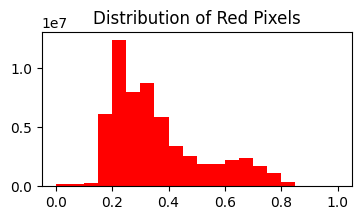

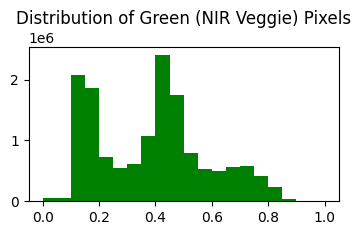

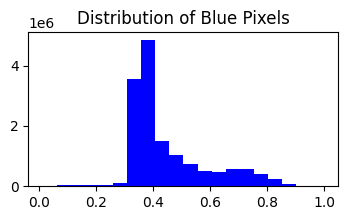

In [ ]:
# Create a histogram for each band to display pixel distribution and confirm value range of 0 to 1.
# np.warnings.filterwarnings('ignore') # Removes warning that array has NaN pixels
hist1 = ep.hist(R,
        figsize=(4, 2),
        colors=['red'],
        title=["Distribution of Red Pixels"])

hist2 = ep.hist(G,
        figsize=(4, 2),
        colors=['green'],
        title=["Distribution of Green (NIR Veggie) Pixels"])

hist3 = ep.hist(B,
        figsize=(4, 2),
        colors=['blue'],
        title=["Distribution of Blue Pixels"])

In [ ]:
# Define the rebin function that will be used to resample the band resolution
# Rebin function from https://stackoverflow.com/questions/8090229/resize-with-averaging-or-rebin-a-numpy-2d-array
def rebin(a, shape):
    sh = shape[0],a.shape[0]//shape[0],shape[1],a.shape[1]//shape[1]
    return a.reshape(sh).mean(-1).mean(1)

#Resample the Red Band resolution
R_rescaled = rebin(R, [3000, 5000]) #CONUS
# R_rescaled = rebin(R, [3000, 3000]) #FULL DISK


In [ ]:
# GOES-R Series satellites do not have a channel in the visible green range. Band 3 is a NIR channel typically used to monitor vegetation.
# Calculate the "True" Green Band to serve as a green proxy for the RGB True Color image, using a fractional combination.
# Source: "Generation of GOES‐16 True Color Imagery without a Green Band" - https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2018EA000379
G_true = 0.45 * R_rescaled + 0.1 * G + 0.45 * B
G_true = np.clip(G_true, 0, 1)  # Apply band limits again, just in case.

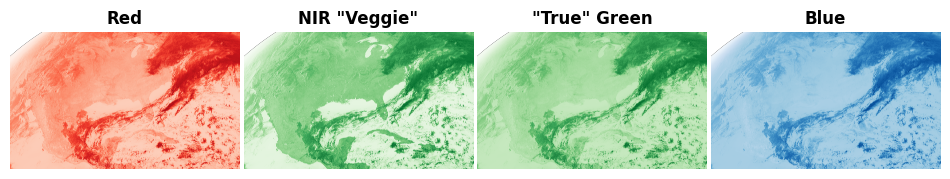

In [ ]:
# Plot the four bands: Band 2 (Red), Band 3 (NIR "Veggie"), "True" Green, and Band 1 (Blue)
fig, ([ax1, ax2, ax3, ax4]) = plt.subplots(1, 4, figsize=(12, 3))

ax1.imshow(R_rescaled, cmap='Reds', vmax=1, vmin=0)
ax1.set_title('Red', fontweight='bold', fontsize=12)
ax1.axis('off')

ax2.imshow(G, cmap='Greens', vmax=1, vmin=0)
ax2.set_title('NIR "Veggie"', fontweight='bold', fontsize=12)
ax2.axis('off')

ax3.imshow(G_true, cmap='Greens', vmax=1, vmin=0)
ax3.set_title('"True" Green', fontweight='bold', fontsize=12)
ax3.axis('off')

ax4.imshow(B, cmap='Blues', vmax=1, vmin=0)
ax4.set_title('Blue', fontweight='bold', fontsize=12)
ax4.axis('off')

plt.subplots_adjust(wspace=.02)
plt.savefig(f'RGB_gen.png', dpi=600 )

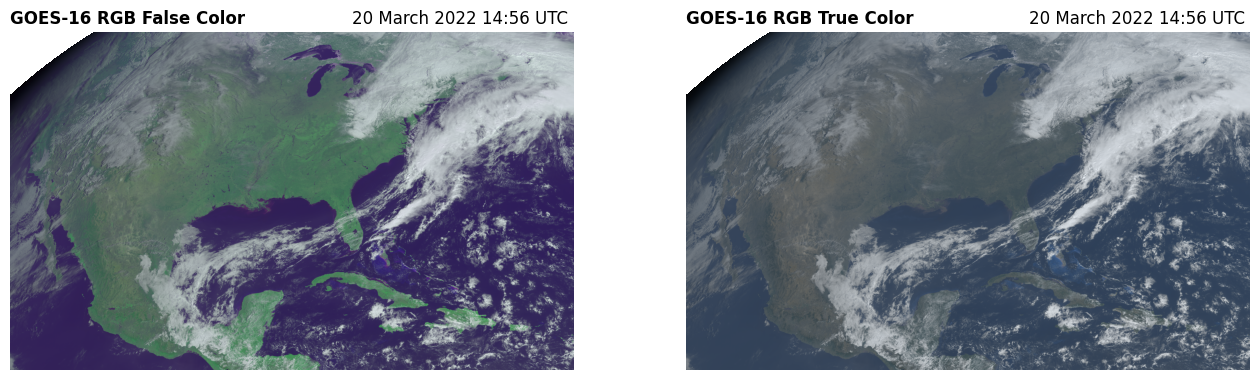

In [ ]:
# Combine three RGB channels with a stacked array, then display the resulting images.

# The RGB array with the raw veggie band
RGB_veggie = np.dstack([R_rescaled, G, B])

# The RGB array for the true color image
RGB = np.dstack([R_rescaled, G_true, B])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# False Color: RGB using the NIR "Veggie" Band
ax1.imshow(RGB_veggie)
ax1.set_title('GOES-16 RGB False Color', fontweight='bold', loc='left',
              fontsize=12)
ax1.set_title('{}'.format(scan_start.strftime('%d %B %Y %H:%M UTC ')),
              loc='right')
ax1.axis('off')

# True Color: RGB for the true color image
ax2.imshow(RGB)
ax2.set_title('GOES-16 RGB True Color', fontweight='bold', loc='left',
              fontsize=12)
ax2.set_title('{}'.format(scan_start.strftime('%d %B %Y %H:%M UTC ')),
              loc='right')
ax2.axis('off')
plt.savefig(f'RGB_True_and_False_Colors.png', dpi=600 )

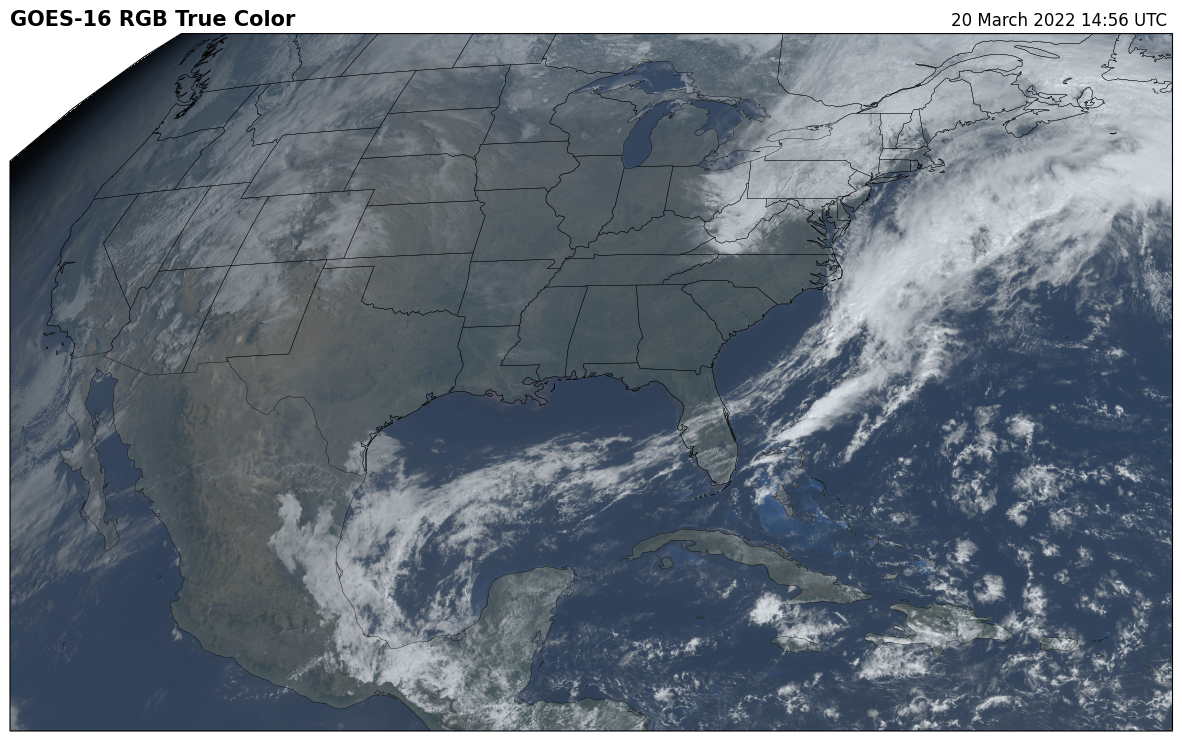

In [ ]:
# Plot with `Cartopy` Geostationary Projection

# Use the `CMI_C01` variable as a 'hook' to retrieve the Climate and Forecast (CF) metadata
data = Band1.metpy.parse_cf('Rad')
geostationary = data.metpy.cartopy_crs

# Sweep the ABI data from the x (north/south) and y (east/west) axes
x = data.x
y = data.y

# Use the geostationary projection to plot the image on a map
# This method streches the image across a map with the same projection and dimensions as the data

fig = plt.figure(figsize=(15, 12))

# Create axis with Geostationary projection
ax = fig.add_subplot(1, 1, 1, projection=geostationary)

# Add the RGB True Color image to the figure. The data is in the same projection as the axis created
ax.imshow(RGB, origin='upper',
          extent=(x.min(), x.max(), y.min(), y.max()), transform=geostationary)

# Add coastlines and states
ax.coastlines(resolution='50m', color='black', linewidth=0.25)
ax.add_feature(ccrs.cartopy.feature.STATES, linewidth=0.25)

#Add title
plt.title('GOES-16 RGB True Color', loc='left', fontweight='bold', fontsize=15)
plt.title('{}'.format(scan_start.strftime('%d %B %Y %H:%M UTC ')), loc='right')

plt.savefig(f'RGB_True_Color_&_Projection.png', dpi=600 )

plt.show()